## Исследование тарифных планов
Заказчик -  коммерческий департамент сотовой связи "Мегалайн".Нужно определить какой из 2 тарифов приносит больше денег.
### План действий:
**Изучение общей информации:**
  - Загрузка библиотек,изученеие файлов с данными, получение общей информации.
   
**Подготовка данных:**
   - Приведение данных к нужным типам
   - Исправление ошибок в данных
   - Добавление новых столбцов
**Анализ данных:**
   - Построение графиков

**Проверка гипотез**

**Вывод**

## Шаг 1. Открываем файл с данными и изучаем общую информацию


Иморт библиотек

In [1]:
!pip install seaborn -U

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.1 MB/s eta 0:00:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Считываем файлы

In [3]:
users = pd.read_csv('/datasets/users.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
internet = pd.read_csv('/datasets/internet.csv',index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
calls = pd.read_csv('/datasets/calls.csv')

Напишем функцию которая будет возвращать первые 5 строк и общую информацию о таблице

In [4]:
def df_info(df):
    display(df.head())
    display(df.describe())
    df.info()

In [5]:
data_list = [users,tariffs,calls,internet,messages]
for df in data_list:
    df_info(df)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Вывод
Пропуски есть только в таблице *users* в столбце **churn_date**, во всех таблицах  формат в столбцах содержащию информацию о дате типа *object*.

## Подготовка данных

### Приведение данных к нужным типам

Функция переводит формат object в дату

In [6]:
def date_format(df, column):
    df[column] = pd.to_datetime(df[column])

In [7]:
date_format(messages, 'message_date')
date_format(internet, 'session_date')
date_format(calls, 'call_date')
date_format(users, 'reg_date')

Для каждой таблице где хранится информация о использование трафика, создадим столбец **month**

In [8]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

Из 202тыс записей по звонкам 39тыс имеют продолжительность звонка 0 мин, так как мы будем расматривать по месяцам кол-во совершенных звонков они будут излишними

In [9]:
calls_not_zero = calls[calls['duration']> 0]
internet_not_zero = internet[internet['mb_used'] > 0]

In [10]:
internet_not_zero['mb_used'] = np.ceil(internet_not_zero['mb_used'])
calls_not_zero['duration'] = np.ceil(calls_not_zero['duration'])

### Агрегация действий абонента

количество сделанных звонков и израсходованных минут разговора по месяцам

In [11]:
calls_stat =calls_not_zero.groupby(['user_id','month']).agg(calls_cnt=('id', 'count'),
                                       duration_total=('duration','sum'))
calls_stat

calls_cnt  duration_total
user_id month                           
1000    5             17           159.0
        6             28           172.0
        7             41           340.0
        8             42           408.0
        9             46           466.0
...                  ...             ...
1498    10            30           247.0
1499    9              8            70.0
        10            44           449.0
        11            62           612.0
        12            56           492.0

[3168 rows x 2 columns]

количество отправленных сообщений по месяцам

In [12]:
messages_stat = messages.groupby(['user_id','month']).agg(messages_cnt=('id', 'count'))
messages_stat

messages_cnt
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

объем израсходованного интернет-трафика по месяцам

In [13]:
internet_stat = internet_not_zero.groupby(['user_id','month']).agg(mb_used_total=('mb_used', 'sum'))
internet_stat

mb_used_total
user_id month               
1000    5             2256.0
        6            23257.0
        7            14016.0
        8            14070.0
        9            14581.0
...                      ...
1498    10           20604.0
1499    9             1848.0
        10           17809.0
        11           17984.0
        12           13077.0

[3201 rows x 1 columns]

Соберем все вместе

In [14]:
full_stat = internet_stat.join([calls_stat,messages_stat], how='outer').reset_index()
full_stat = full_stat.set_index('user_id')
full_stat

,month,mb_used_total,calls_cnt,duration_total,messages_cnt
user_id,,,,,
1000,5,2256.0,17.0,159.0,22.0
1000,6,23257.0,28.0,172.0,60.0
1000,7,14016.0,41.0,340.0,75.0
1000,8,14070.0,42.0,408.0,81.0
1000,9,14581.0,46.0,466.0,57.0
...,...,...,...,...,...
1498,10,20604.0,30.0,247.0,42.0
1499,9,1848.0,8.0,70.0,11.0
1499,10,17809.0,44.0,449.0,48.0


Объяденим *users* с *full_stat*

In [15]:
users = users.set_index('user_id')
users = users.join(full_stat)
users

,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used_total,calls_cnt,duration_total,messages_cnt
user_id,,,,,,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,2256.0,17.0,159.0,22.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,23257.0,28.0,172.0,60.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,14016.0,41.0,340.0,75.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,14070.0,42.0,408.0,81.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,14581.0,46.0,466.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,20604.0,30.0,247.0,42.0
1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,1848.0,8.0,70.0,11.0
1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,17809.0,44.0,449.0,48.0


Для того что бы посчитать помесячную выручку с каждого пользователя необходимо добавить информацию по тарифу

In [16]:
df = users.reset_index().merge(tariffs, left_on='tariff', right_on='tariff_name',how='left').set_index('user_id')
df

,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used_total,calls_cnt,duration_total,messages_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
user_id,,,,,,,,,,,,,,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,2256.0,17.0,159.0,22.0,1000,30720,3000,1950,150,1,1,ultra
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,23257.0,28.0,172.0,60.0,1000,30720,3000,1950,150,1,1,ultra
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,14016.0,41.0,340.0,75.0,1000,30720,3000,1950,150,1,1,ultra
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,14070.0,42.0,408.0,81.0,1000,30720,3000,1950,150,1,1,ultra
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,14581.0,46.0,466.0,57.0,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,20604.0,30.0,247.0,42.0,50,15360,500,550,200,3,3,smart
1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,1848.0,8.0,70.0,11.0,50,15360,500,550,200,3,3,smart
1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,17809.0,44.0,449.0,48.0,50,15360,500,550,200,3,3,smart


Посмотрим есть ли в нашей таблице пустые значения

In [17]:
df.isnull().sum()

age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
month                       2
mb_used_total              15
calls_cnt                  48
duration_total             48
messages_cnt              499
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
dtype: int64

Посмотрим 2 пустых значения по столбцу **month**,остальные пропуски можно заполнить 0,так как скорее всего абонент не совершал действий

In [18]:
df[df['month'].isnull()]

,age,churn_date,city,first_name,last_name,reg_date,tariff,month,mb_used_total,calls_cnt,duration_total,messages_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
user_id,,,,,,,,,,,,,,,,,,,,
1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1,ultra
1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaN,NaN,NaN,NaN,50,15360,500,550,200,3,3,smart


Два абонента совсем не пользовались услугами, и были с нами не долго,давайте удалим записи по ним

In [19]:
df = df.dropna(subset=['month'])
df['month'] = df['month'].astype('int')

Заполним оставшиеся пропуски 0 значением

In [20]:
df = df.fillna(0)

Приведем все столбцы типа float в int

In [21]:
list_float_to_int = list(df.select_dtypes(include=['float']).columns.values)
list_float_to_int

['mb_used_total', 'calls_cnt', 'duration_total', 'messages_cnt']

In [22]:
df[list_float_to_int] = df[list_float_to_int].astype('int')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1000 to 1499
Data columns (total 20 columns):
age                      3214 non-null int64
churn_date               3214 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
month                    3214 non-null int64
mb_used_total            3214 non-null int64
calls_cnt                3214 non-null int64
duration_total           3214 non-null int64
messages_cnt             3214 non-null int64
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
tariff_name          

Информацию для рассчетов добавили,теперь возьмем только нужные столбцы

In [24]:
columns = ['city', 'reg_date','tariff','month','messages_cnt','messages_included','mb_used_total','mb_per_month_included','duration_total','minutes_included','rub_monthly_fee','rub_per_gb','rub_per_message','rub_per_minute']
df = df.loc[:,columns]
df

,city,reg_date,tariff,month,messages_cnt,messages_included,mb_used_total,mb_per_month_included,duration_total,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
user_id,,,,,,,,,,,,,,
1000,Краснодар,2018-05-25,ultra,5,22,1000,2256,30720,159,3000,1950,150,1,1
1000,Краснодар,2018-05-25,ultra,6,60,1000,23257,30720,172,3000,1950,150,1,1
1000,Краснодар,2018-05-25,ultra,7,75,1000,14016,30720,340,3000,1950,150,1,1
1000,Краснодар,2018-05-25,ultra,8,81,1000,14070,30720,408,3000,1950,150,1,1
1000,Краснодар,2018-05-25,ultra,9,57,1000,14581,30720,466,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,Владикавказ,2018-07-19,smart,10,42,50,20604,15360,247,500,550,200,3,3
1499,Пермь,2018-09-27,smart,9,11,50,1848,15360,70,500,550,200,3,3
1499,Пермь,2018-09-27,smart,10,48,50,17809,15360,449,500,550,200,3,3


Напишем функцию для подсчета прибыли

In [25]:
def revenue(row):
    mb_used_total = row['mb_used_total']
    mb_per_month_included = row['mb_per_month_included']
    duration_total = row['duration_total']
    minutes_included = row['minutes_included']
    messages_cnt = row['messages_cnt']
    messages_included = row['messages_included']
    rub_per_gb = row['rub_per_gb']
    rub_per_minute = row['rub_per_minute']
    rub_per_message = row['rub_per_message']
    rub_monthly_fee = row['rub_monthly_fee']
    revenue = 0
    revenue += rub_monthly_fee
    if mb_used_total > mb_per_month_included:
        over_tariff_mb = np.ceil((mb_used_total - mb_per_month_included) / 1024) * rub_per_gb
        revenue += over_tariff_mb
    if duration_total > minutes_included:
        over_tariff_calls = (duration_total - minutes_included) * rub_per_minute
        revenue += over_tariff_calls
    if messages_cnt > messages_included:
        over_tariff_calls = (messages_cnt -  messages_included) * rub_per_message
        revenue += over_tariff_calls
   
    
    return int(revenue)

применяем функцию и округляем значение

In [26]:
df['revenue'] = df.apply(revenue, axis=1)
df.head(10)

,city,reg_date,tariff,month,messages_cnt,messages_included,mb_used_total,mb_per_month_included,duration_total,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
user_id,,,,,,,,,,,,,,,
1000,Краснодар,2018-05-25,ultra,5,22,1000,2256,30720,159,3000,1950,150,1,1,1950
1000,Краснодар,2018-05-25,ultra,6,60,1000,23257,30720,172,3000,1950,150,1,1,1950
1000,Краснодар,2018-05-25,ultra,7,75,1000,14016,30720,340,3000,1950,150,1,1,1950
1000,Краснодар,2018-05-25,ultra,8,81,1000,14070,30720,408,3000,1950,150,1,1,1950
1000,Краснодар,2018-05-25,ultra,9,57,1000,14581,30720,466,3000,1950,150,1,1,1950
1000,Краснодар,2018-05-25,ultra,10,73,1000,14717,30720,350,3000,1950,150,1,1,1950
1000,Краснодар,2018-05-25,ultra,11,58,1000,14768,30720,338,3000,1950,150,1,1,1950
1000,Краснодар,2018-05-25,ultra,12,70,1000,9827,30720,333,3000,1950,150,1,1,1950
1001,Москва,2018-11-01,smart,11,0,50,18452,15360,430,500,550,200,3,3,1350


### Вывод
Привели столбцы с датой в формат даты, рассчитали для каждого абонента помесячно количество отправленных смс, суммарное продолжительность звонков, использование интернет трафика.Посчитали помесячную выручку с каждого пользователя.

## Анализ

Посмотрим на среднее и стандартное отклонение для каждого из тарифов

In [27]:
mean_df = df.pivot_table(index=['tariff'], values=['duration_total','messages_cnt','mb_used_total'],aggfunc=['mean','var','std'])
mean_df.round().T

tariff                    smart        ultra
mean duration_total       418.0        527.0
     mb_used_total      16229.0      19487.0
     messages_cnt          33.0         49.0
var  duration_total     36219.0     100874.0
     mb_used_total   34545911.0  101935621.0
     messages_cnt         797.0       2285.0
std  duration_total       190.0        318.0
     mb_used_total       5878.0      10096.0
     messages_cnt          28.0         48.0

Среднее значение по тарифу smart использование интернет трафика привышает лимит по тарифу на 848 мб

### Графики

Напишем функцию для построение ящика с усами

In [28]:
def boxplot_plot(data,y_col,tariff_lim,title):
    '''Функция принимает аргументы:
       data - таблица
       y_col - по какому значению будет строить график
       tariff_lim - лимит трафика 
       title - заголовок
    '''
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x='month', y= y_col, data=data, hue='tariff') 
    lim_smart = data[data['tariff'] =='smart'][tariff_lim].unique()
    lim_ultra = data[data['tariff'] =='ultra'][tariff_lim].unique()
    plt.axhline(lim_smart,linestyle='--', color = 'r',lw=2, label='лимит Smart')
    plt.axhline(lim_ultra,linestyle='--', color = 'b',lw=2, label='лимит Ultra') 
    plt.title(title)
    labels = ["лимит Smart", 'лимит Ultra',"Smart", "Ultra"]
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles = handles, labels = labels, loc='upper left')
    plt.xlabel('Месяц')
    plt.ylabel('')
    plt.show()

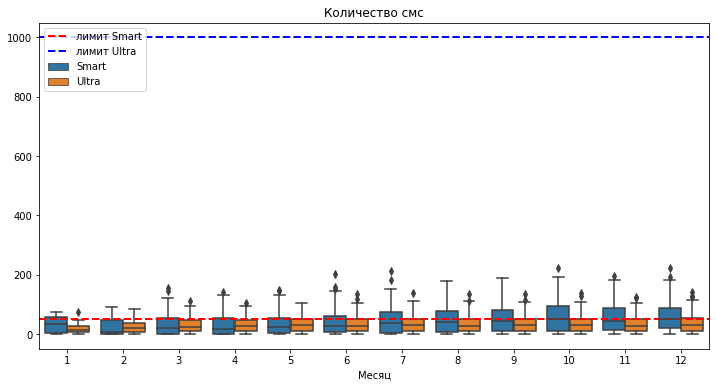

In [29]:
boxplot_plot(df,'messages_cnt', 'messages_included', 'Количество смс')

По тарифу Smart небольшая группа абонентов часто привышают лимит в 50 отправленных смс в месяц,но основная масса укладывается в лимит, косательно тарифа Ultra все укладываются в лимит в основном отправляют до 250 смс.

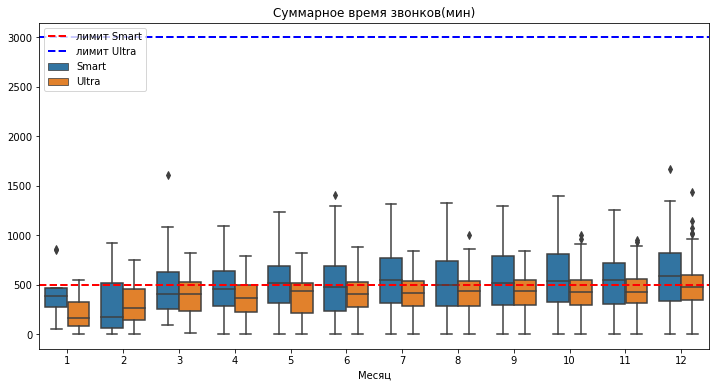

In [30]:
boxplot_plot(df,'duration_total', 'minutes_included','Суммарное время звонков(мин)')

Абоненты с тарифом Smart 75% укладываются в 500 мин разговора, за некоторыми исключениями, самые явные в ноябре и декабре, так же в эти месяцы наблюдаются выбросы которые превышают 1,5 межквантельного размаха.

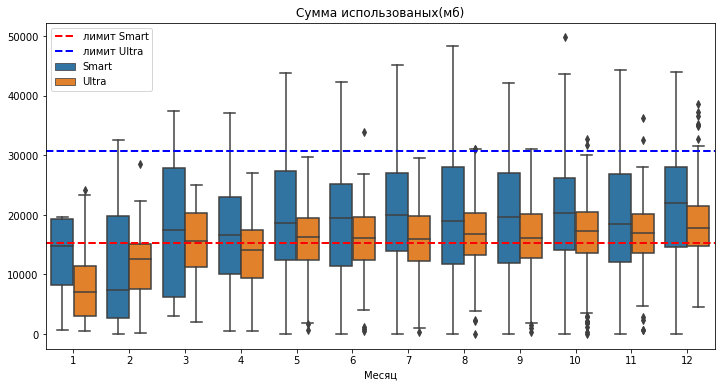

In [31]:
boxplot_plot(df,'mb_used_total', 'mb_per_month_included','Сумма использованых(мб)')

По тарифу Smart в большинстве случаев абоненты переваливают за месячный лимит на 5 гб, есть случаи превышение лимита в два раза 

Напишем функцию для построение гистограмм 

In [32]:
def drawing_hist(data):
    title_dict = {'messages_cnt': 'Кол-во смс', 'mb_used_total': 'Сумма использованых(мб)', 'duration_total': 'Суммарное время звонков(мин)', 'revenue':'Выручка(руб)'}
    for key ,values in title_dict.items():          
            plt.rcParams['figure.figsize']=(20,10)
            g = sns.displot(data, x=key, hue="tariff",bins=50,legend=False)
            plt.title(values)
            plt.ylabel('Частота')
            smart_median = data[data['tariff']=='smart'][key].median()
            ultra_median = data[data['tariff']=='ultra'][key].median()
            plt.axvline(smart_median,linestyle='--', color = 'b')
            plt.axvline(ultra_median,linestyle='--', color='r')
            plt.legend({'median smart':smart_median, 'ultra median':ultra_median, 'Smart':'Smart', 'Ultra':'Ultra'})
            g.fig.set_size_inches(10,8)
            plt.show()

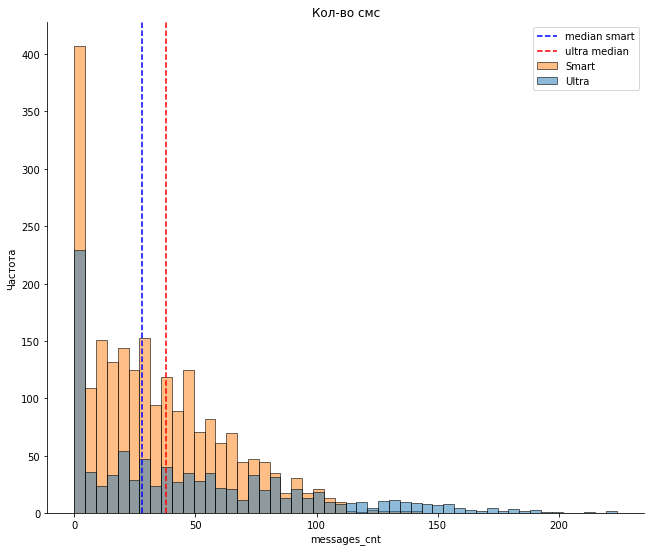

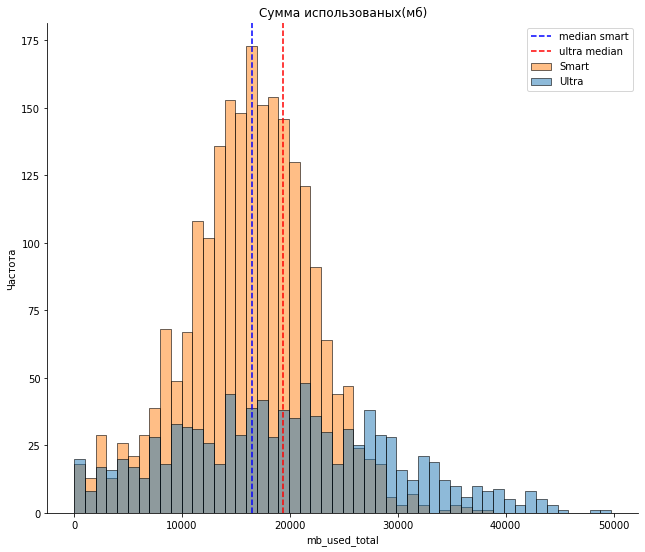

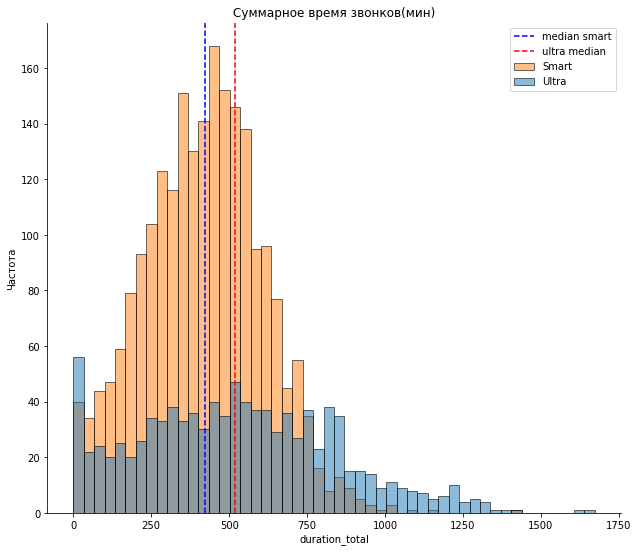

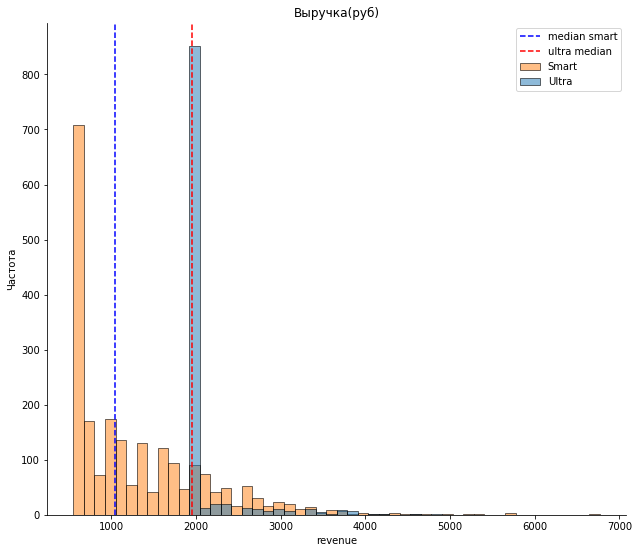

In [33]:
drawing_hist(df)

По количеству смс много 0 значений в основном абоненты укладываются в 70 смс, по сумме использованных мб напоминает график нормальное распределение чуть с кошенным в право пик приходится на 18 тыс мб.Суммарное время звонков в районе 300 до 600 минут, пик около 450 минут

In [34]:
revenue_stat = df.pivot_table(index=['tariff'], values='revenue', aggfunc=['mean','median','sum'])
revenue_stat.columns = ['mean_revenue', 'median_revenue','total_revenue']

In [35]:
df = df.reset_index()
revenue_stat['unique_user'] = df.groupby('tariff')['user_id'].nunique()
revenue_stat['unique_user_revenue'] = np.ceil(revenue_stat['total_revenue'] / revenue_stat['unique_user'] )
revenue_stat

,mean_revenue,median_revenue,total_revenue,unique_user,unique_user_revenue
tariff,,,,,
smart,1294.63930,1038,2885751,350,8246.0
ultra,2071.06599,1950,2040000,148,13784.0


### Вывод
В разрезе двух тарифов по тарифу Smart абонентом явно не хватает месячного лимита, особенно интернет трафика в отдельных случаех доходило привышение лимита в 2 раза, также не хватает минут для разговора.За год тариф Smart принес на 845 тыс рублей больше.Доход от одного уникального абонента по тарифу Ultra 13784 рубля, по тарифу Smart всего 8246 рублей, при том что количество абонентов Smart больше 2,3 раза.

## Проверка гипотез

$H_{0}$ средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

$H_{1}$ средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [36]:
smart_sample = df[df['tariff'] == 'smart']['revenue']
ultra_sample=df[df['tariff'] == 'ultra']['revenue']

In [37]:
smart_sample.var()

673931.3213632443

In [38]:
ultra_sample.var()

143491.24055961374

In [39]:
def hypothesis_check(sample_1, sample_2, equal_var=True):
    results = st.ttest_ind(sample_1, sample_2, equal_var=equal_var)
    alpha = 0.05
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [40]:
hypothesis_check(smart_sample,ultra_sample,False)

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


$H_{0}$ средняя выручка пользователей из Москвы и других регионов равны

$H_{1}$ средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


In [41]:
moscow_sample = df[df['city'] == 'Москва']['revenue']
another_city_sample = df[df['city'] != 'Москва']['revenue']

In [42]:
moscow_sample.var()


566183.0292184273

In [43]:
another_city_sample.var()

656766.5955122438

In [44]:
hypothesis_check(moscow_sample,another_city_sample)

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


## Вывод

Тариф Smart недастает интернет трафика, несмотря на то что количество абонентов с тарифом Smart больше в 2,3 раза , за год они принесли 8246 рубля, а тариф Ultra принес 13784 рубля.Проверили две гипотезы о том что средние значение выручки различны , да они различны, и средняя выручка пользователей из Москвы и других регионов нет существенных отличий.По итогу тариф Ultra наиболее перспективнее.